# Network Comparison

## Validation Accuracy and Loss

In [ ]:
import re
import csv
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from scipy.ndimage.filters import gaussian_filter1d


names = {
    'mnist': 'MNIST',
    'fashion_mnist': 'Fashion MNIST',
    'cifar10': 'CIFAR10',
    'imdb': 'IMDB',
    'lenet': 'LeNet',
    'lstm': 'LSTM'
}
    

def show(dataset_name, model_name):
    fig = plt.figure(figsize=(12, 8), dpi=100)
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    fig.suptitle(f'{names[dataset_name]} {names[model_name]}', fontsize=18, y=0.95)
    ax1.set_title('Validation Accuracy')
    ax2.set_title('Filtered Validation Accuracy')
    ax3.set_title('Validation Loss')
    ax4.set_title('Filtered Validation Loss')
    fig.text(0.5, 0.06, 'epoch', ha='center', fontsize=12)
    
    def get_data(metrics):
        data = {}
        dir_paths = glob(f'../data/{dataset_name}_{model_name}_*')
        dir_paths.sort()
        for dir_path in dir_paths:
            optimizer_name = re.search(r'../data/.+_.+_(.+)', dir_path).group(1)
            temp = []
            for path in glob(f'{dir_path}/*/result.csv'):
                with open(path) as f:
                    rows = np.array([row for row in csv.reader(f)])
                idx = np.where(rows[0] == metrics)[0]
                row = rows[1:, idx]
                row = row.reshape(len(row))
                row = row.astype(np.float)
                temp.append(row)
            data[optimizer_name] = np.mean(np.array(temp), axis=0)
        return data

    acc_data = get_data('val_accuracy')
    loss_data = get_data('val_loss')
    
    for optimizer_name, y in acc_data.items():
        x = np.arange(0, len(y), 1)
        filtered_y = gaussian_filter1d(y, sigma=10)
        
        ax1.plot(x, y, label=optimizer_name)
        ax2.plot(x, filtered_y, label=optimizer_name)
        
    for optimizer_name, y in loss_data.items():
        x = np.arange(0, len(y), 1)
        filtered_y = gaussian_filter1d(y, sigma=10)
            
        ax3.plot(x, y, label=optimizer_name)
        ax4.plot(x, filtered_y, label=optimizer_name)

    plt.legend(bbox_to_anchor=(1.4, 2.2), loc='upper right', borderaxespad=1)
    plt.show()

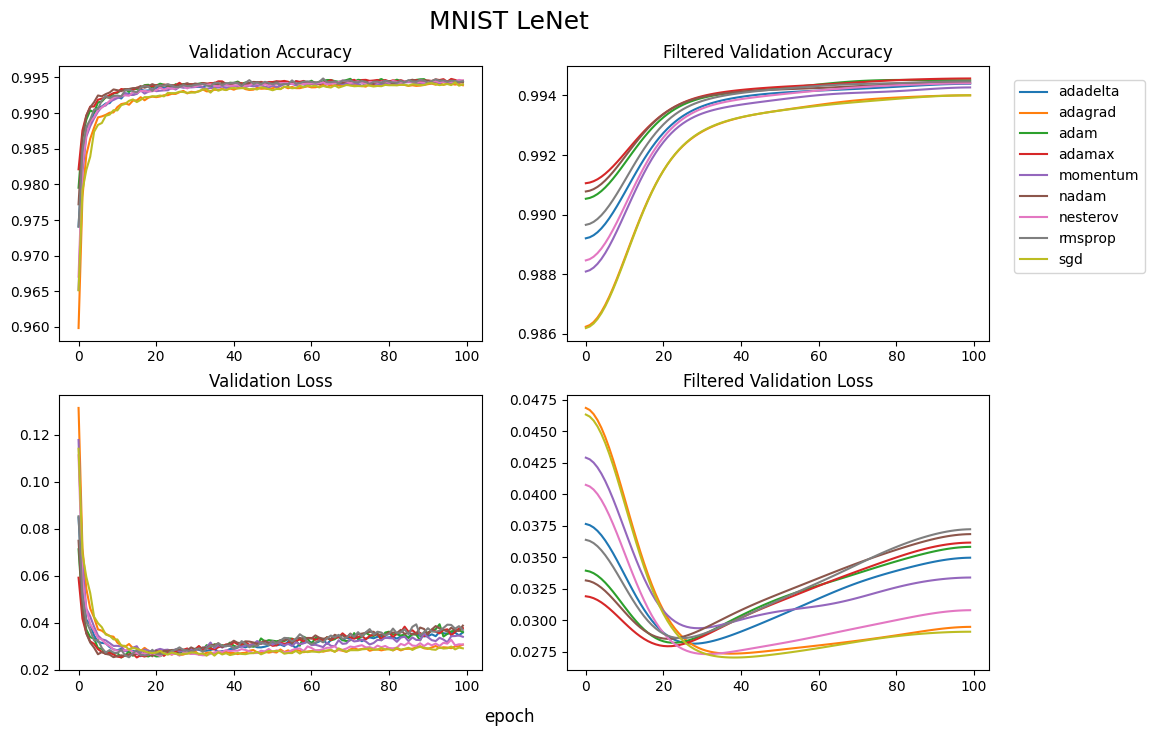

In [201]:
show('mnist', 'lenet')

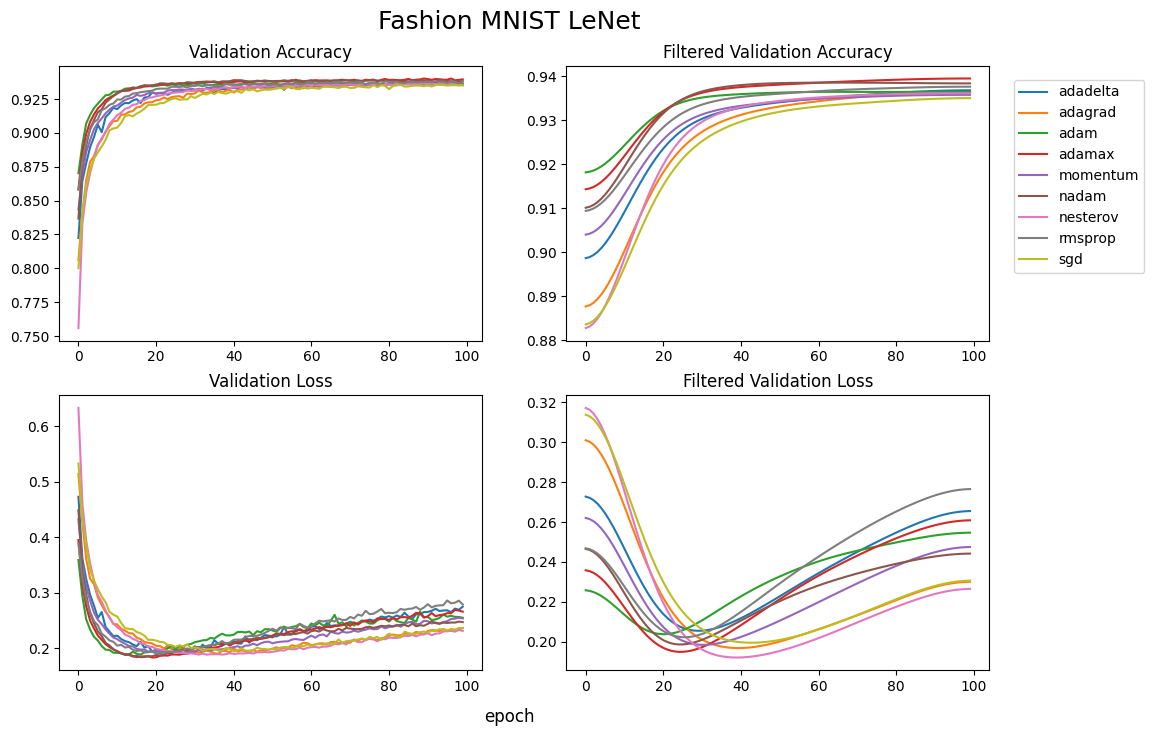

In [202]:
show('fashion_mnist', 'lenet')

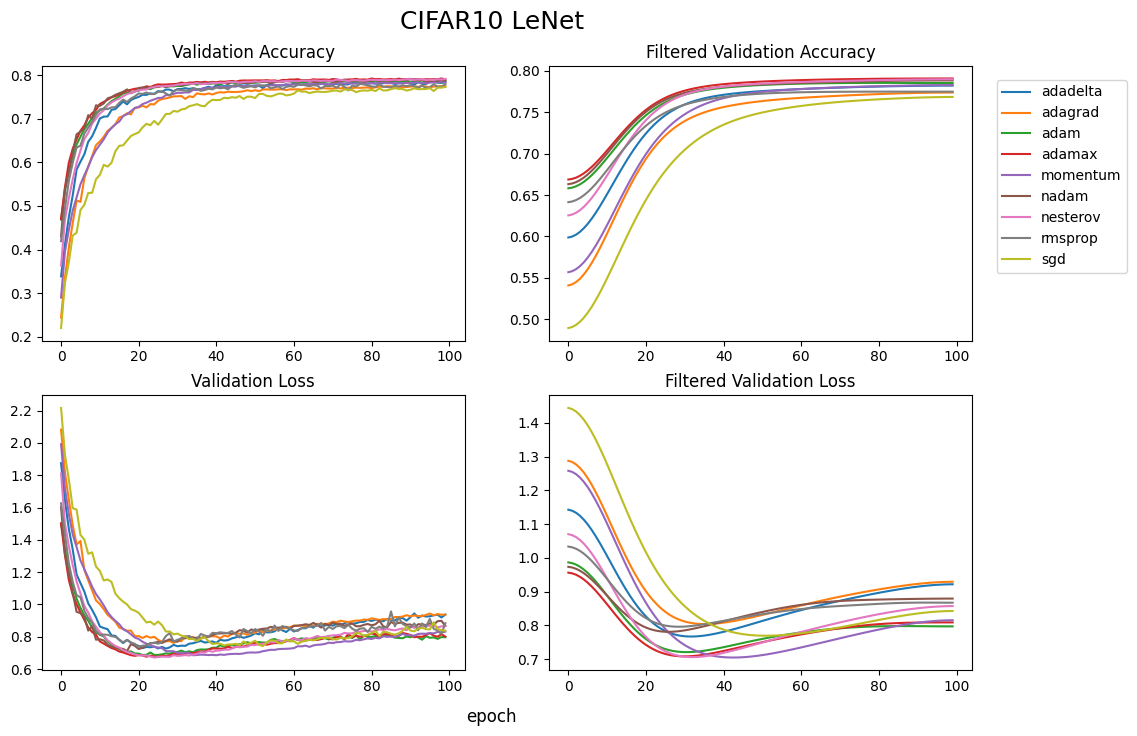

In [203]:
show('cifar10', 'lenet')

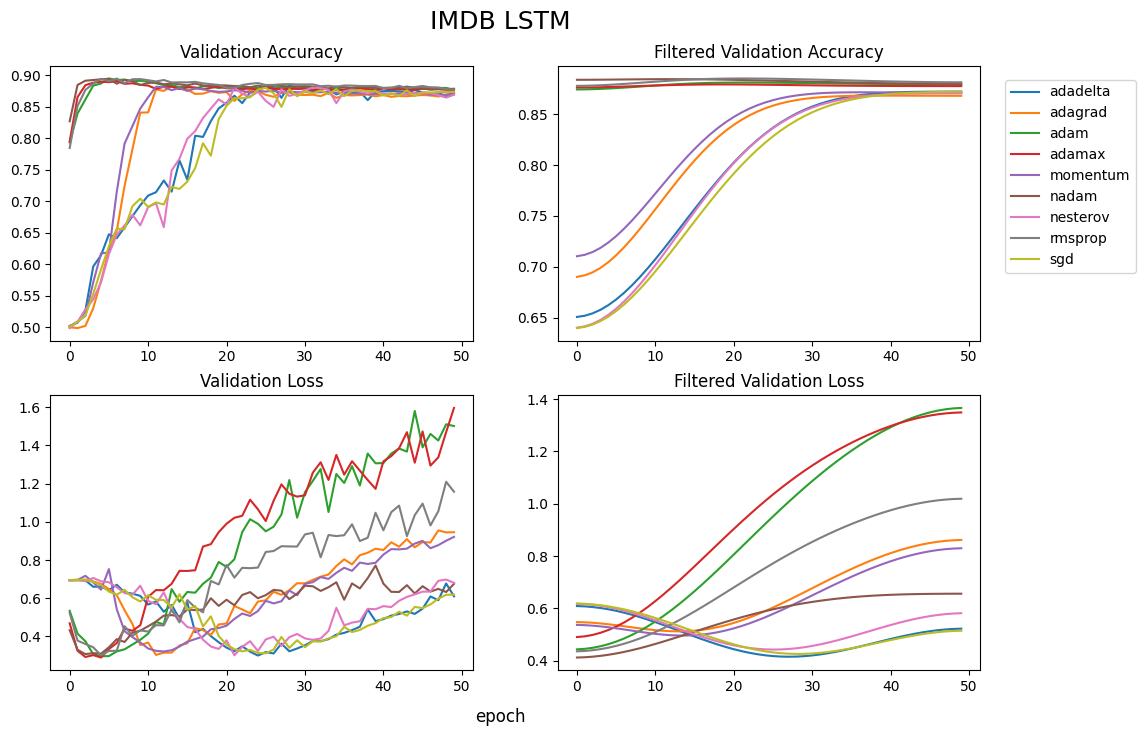

In [204]:
show('imdb', 'lstm')